## Final Project Submission

Please fill out:
* Student name: LaShanni Butler
* Student pace: Part time
* Scheduled project review date/time: 5/29/19 @ 11:15AM PST 
* Instructor name: Jeff Herman
* Blog post URL:https://sugaboo.github.io/car_insurance_predictive_modeling


## Problem Statement

The client would like to know the most important factor that determines cold calling success.  So we’ll use predictive models (i.e. – Machine Learning techniques) to see which factor(s) are successful. 

# Step 1: Loading Libraries and data set

In [1]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score,KFold,cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score,confusion_matrix,precision_recall_curve,roc_curve
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn import svm,tree
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.neighbors import NearestNeighbors
from sklearn.exceptions import DataConversionWarning
import warnings
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('carInsurance_train.csv')

## Learning about the data set

In [3]:
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
4,5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [4]:
df.tail()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
3995,3996,28,technician,single,tertiary,0,0,1,0,cellular,25,may,1,40,2,failure,17:46:28,17:50:57,1
3996,3997,49,admin.,divorced,secondary,0,124,1,1,cellular,29,jul,19,-1,0,NaN,14:49:16,14:51:21,0
3997,3998,27,admin.,single,secondary,0,-400,0,1,cellular,8,jul,1,-1,0,NaN,12:19:03,12:23:53,0
3998,3999,36,entrepreneur,single,tertiary,0,658,1,0,cellular,29,jan,1,227,3,failure,11:27:35,11:29:14,0
3999,4000,45,services,married,primary,0,137,1,0,NaN,9,may,2,-1,0,NaN,13:31:48,13:36:22,0


In [5]:
#setting index column
df = pd.read_csv('carInsurance_train.csv',index_col = 'Id')

In [6]:
#check to verify index begins at ID column
df.head()

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,NaN,13:45:20,13:46:30,0
2,32,blue-collar,married,primary,0,1156,1,0,NaN,26,may,5,-1,0,NaN,14:49:03,14:52:08,0
3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,failure,16:30:24,16:36:04,1
4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,NaN,12:06:43,12:20:22,1
5,30,management,married,tertiary,0,2694,0,0,cellular,3,jun,1,-1,0,NaN,14:35:44,14:38:56,0


In [7]:
df.shape

(4000, 18)

In [8]:
df.columns

Index(['Age', 'Job', 'Marital', 'Education', 'Default', 'Balance',
       'HHInsurance', 'CarLoan', 'Communication', 'LastContactDay',
       'LastContactMonth', 'NoOfContacts', 'DaysPassed', 'PrevAttempts',
       'Outcome', 'CallStart', 'CallEnd', 'CarInsurance'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 1 to 4000
Data columns (total 18 columns):
Age                 4000 non-null int64
Job                 3981 non-null object
Marital             4000 non-null object
Education           3831 non-null object
Default             4000 non-null int64
Balance             4000 non-null int64
HHInsurance         4000 non-null int64
CarLoan             4000 non-null int64
Communication       3098 non-null object
LastContactDay      4000 non-null int64
LastContactMonth    4000 non-null object
NoOfContacts        4000 non-null int64
DaysPassed          4000 non-null int64
PrevAttempts        4000 non-null int64
Outcome             958 non-null object
CallStart           4000 non-null object
CallEnd             4000 non-null object
CarInsurance        4000 non-null int64
dtypes: int64(10), object(8)
memory usage: 593.8+ KB


Data types show 10 integer columns and 8 object columns

In [10]:
#Checking for missing values in each column
df.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3042
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

The following columns are strings (NaN values):
* Job: 19
* Education: 169
* Communication: 902
* Outcome: 3042

I'll address the missing values after running an outlier check

## Checking any potential outliers

In [11]:
#calling summary stats 
df.describe()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


At a quick visual glance, I see that Balance has a fairly large range (i.e. - min at -3,058 and max at 98,417).

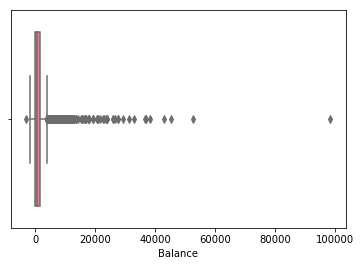

In [12]:
# Plotting Balance field as a Boxplot using Seaborn
sns.boxplot(x='Balance',data=df,palette='husl');

In [13]:
df[df['Balance'] == 98417]

,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
Id,,,,,,,,,,,,,,,,,,
1743,59,management,married,tertiary,0,98417,0,0,telephone,20,nov,5,-1,0,NaN,10:51:42,10:54:07,0


In [14]:
#Since this is skewing the data, I think it's best to drop it
df = df.drop(df.index[1742]);

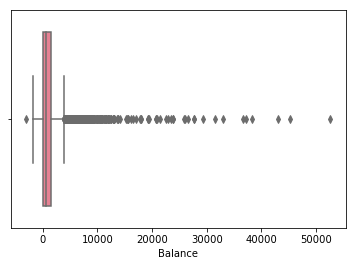

In [15]:
#verifying that oulier is eliminated from the data set
sns.boxplot(x='Balance',data=df,palette='husl');

## Coming back to null values

In [16]:
df.isnull().sum()

Age                    0
Job                   19
Marital                0
Education            169
Default                0
Balance                0
HHInsurance            0
CarLoan                0
Communication        902
LastContactDay         0
LastContactMonth       0
NoOfContacts           0
DaysPassed             0
PrevAttempts           0
Outcome             3041
CallStart              0
CallEnd                0
CarInsurance           0
dtype: int64

In [17]:
# Using frontfill for the missing values in Job and Education 
#source: https://stackoverflow.com/questions/48585947/in-fillna-what-is-the-difference-between-pad-and-ffill-method
df['Job'] = df['Job'].fillna(method ='ffill')
df['Education'] = df['Education'].fillna(method ='ffill')

In [18]:
# Replacing NaN with none for Communication and Outcome 
df['Communication'] = df['Communication'].fillna('none')
df['Outcome'] = df['Outcome'].fillna('none')

In [19]:
df.isnull().sum()

Age                 0
Job                 0
Marital             0
Education           0
Default             0
Balance             0
HHInsurance         0
CarLoan             0
Communication       0
LastContactDay      0
LastContactMonth    0
NoOfContacts        0
DaysPassed          0
PrevAttempts        0
Outcome             0
CallStart           0
CallEnd             0
CarInsurance        0
dtype: int64

The null values have been filled in and should not affect the data analysis and modeling

# Step 2: EDA

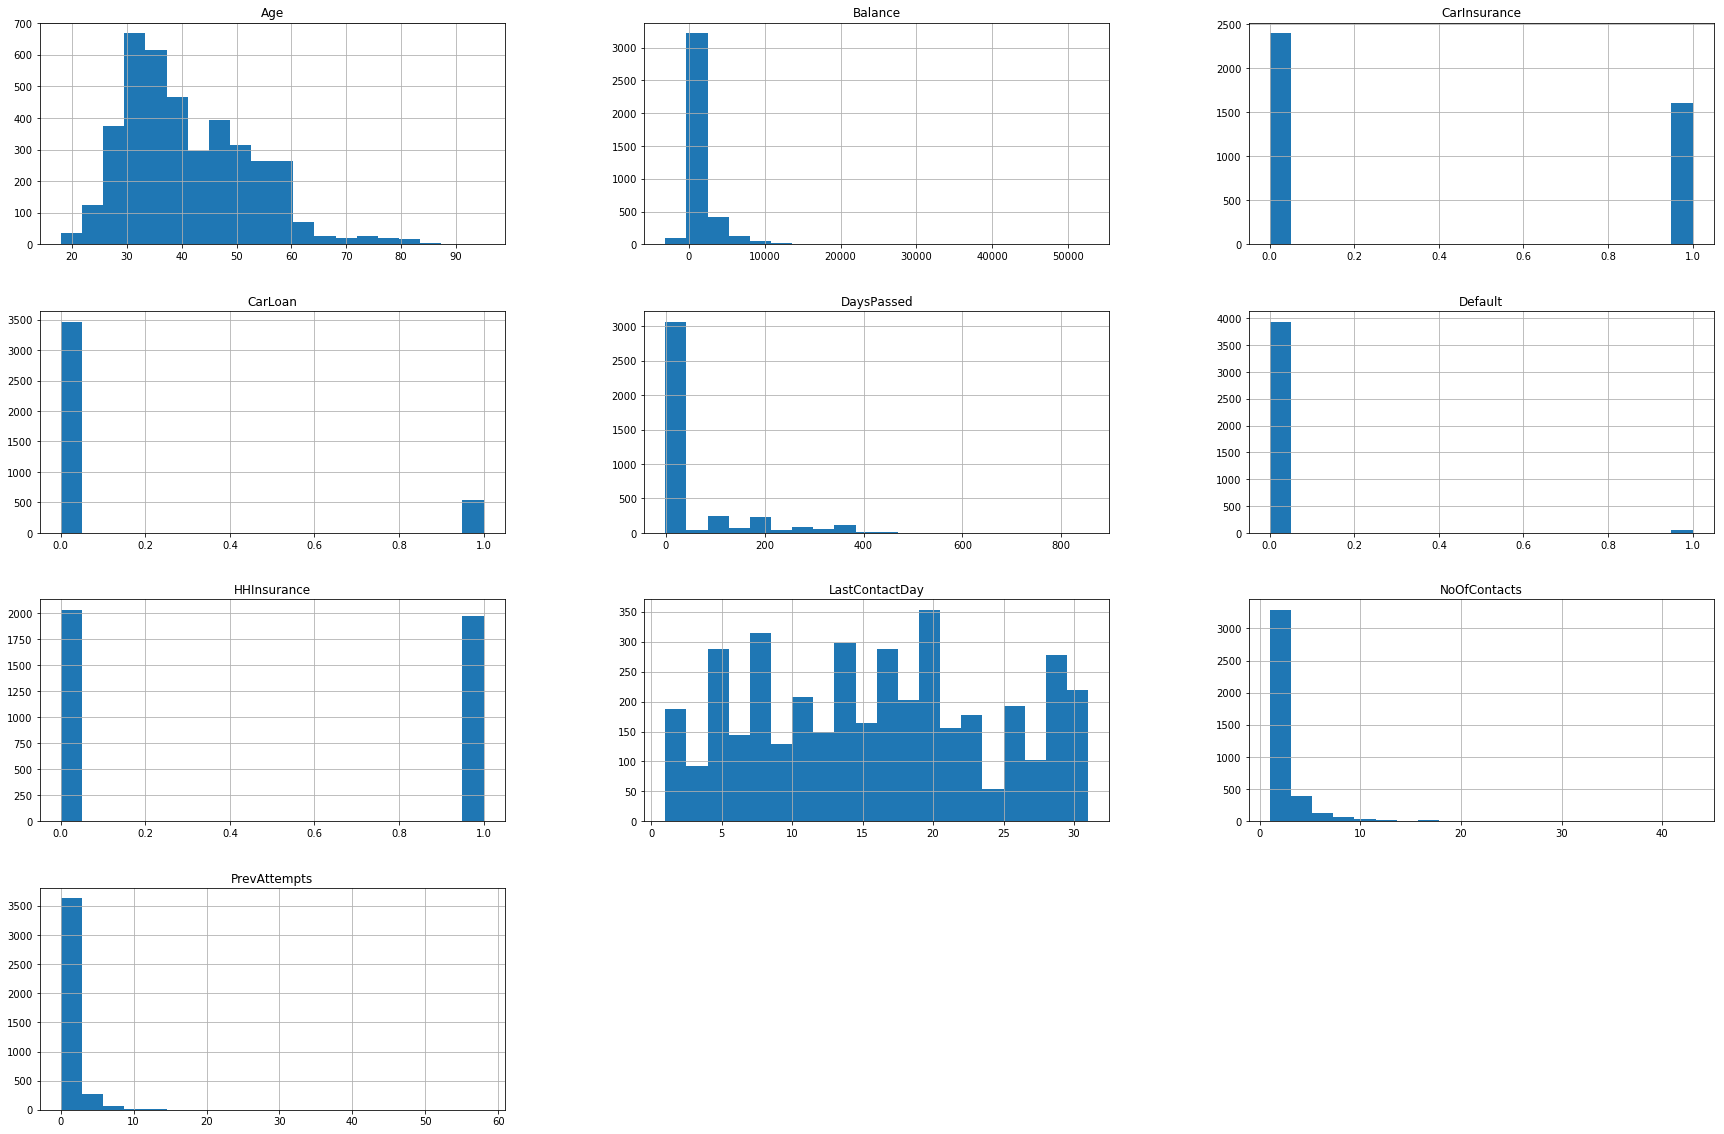

In [20]:
df.hist(figsize=(30,20), bins=20);

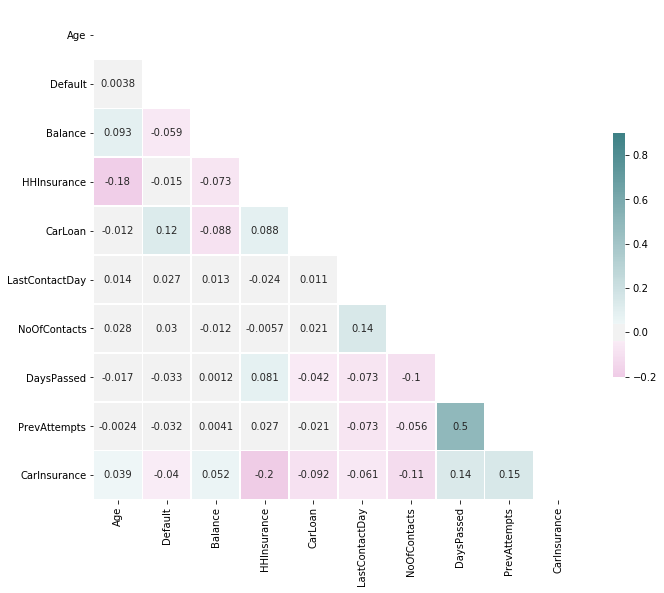

In [21]:
#Setting up correlation for our dataframe and passing it to seaborn heatmap function
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(325, 200, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Key takeaways:
* Columns with positive correlations with Car Insurance are:
    * Age, Balance, Days Passed, and Prev Attempts
    
    
* Columns with negative correlation with Car insurance are:
    * Default, HHInsurance, Car Loan, Last Contact Day, and No Of Contacts
    
    
* Age appears to affect if one buys Car Insurance


* Individuals who are contacted more are likely to buy Car Insurance

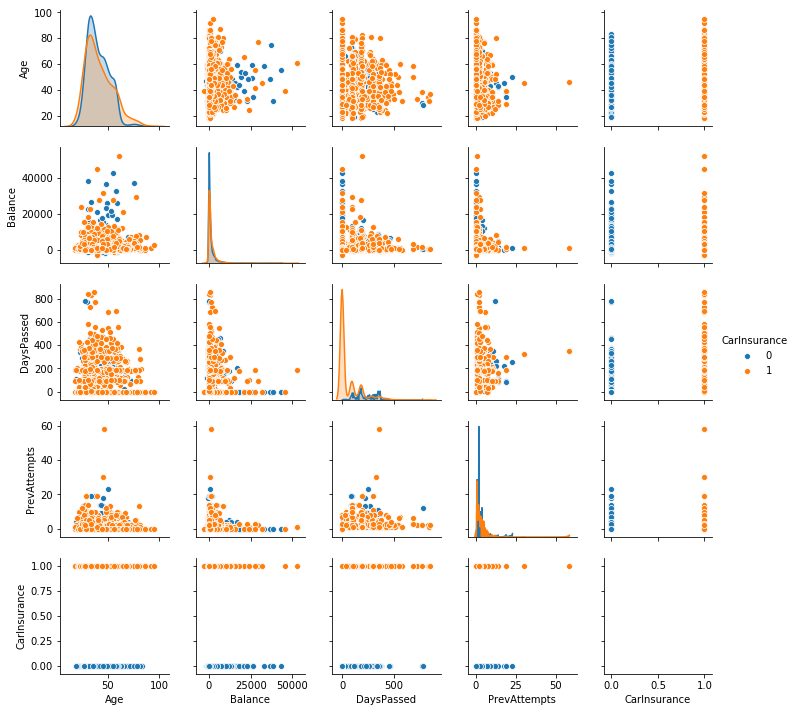

In [22]:
#Now plotting categories against Car Insurance in Seaborn pairplot
df_pp = ['Age','Balance','DaysPassed','PrevAttempts','CarInsurance']
sns.pairplot(df[df_pp],hue='CarInsurance',size=2.0);

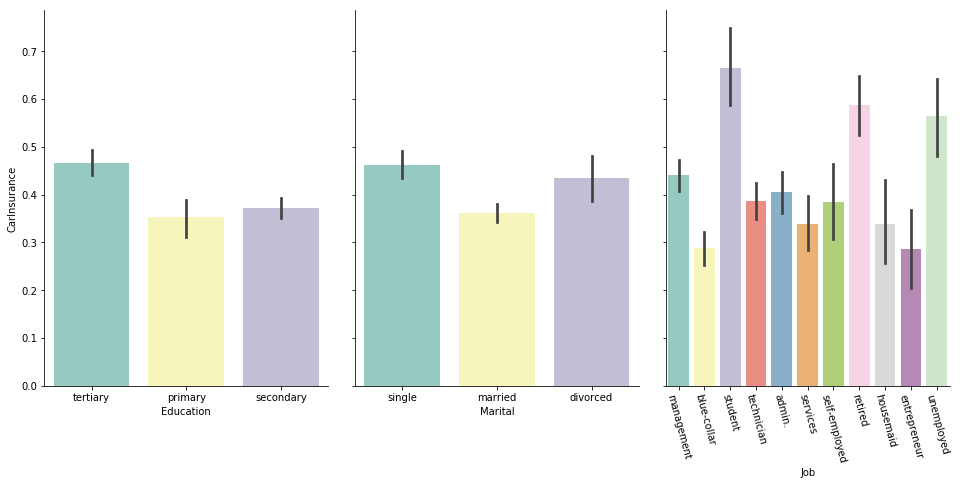

In [23]:
#Pair grid of categorical values 
cat_pg = sns.PairGrid(df,
                 x_vars=['Education','Marital', 'Job'],
                 y_vars=['CarInsurance'],
                 aspect=.75, size=6)
plt.xticks(rotation=-75)
cat_pg.map(sns.barplot, palette='Set3');

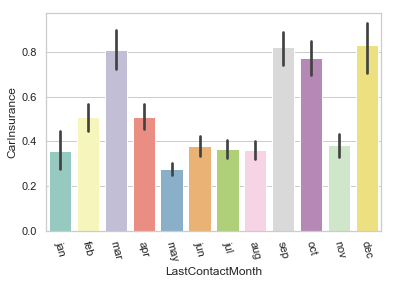

In [24]:
sns.set(style='whitegrid')
Months = Months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                    'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.barplot(x='LastContactMonth', y='CarInsurance', 
                      data=df, order=Months, palette='Set3')
plt.xticks(rotation=-75)
plt.show(); 

Key Takeaways:
* People with teriary (advanced) educations are more likely to purchase insurance

* Single people are more likely to purchase insurance

* Students, retired and unemployed people are purchasing the most car insurance polices

* Many people buy insurance in March, September, October and December

## Step 3: Predictive Modeling

Cleaning data for cleaner modeling

In [41]:
#Keeping Age and Balance per Jeff's recommendation
#Binning continuous variables (Age and Balance)
#df['AgeBinned'] = pd.qcut(df['Age'], 5 , labels = False)
#df['BalanceBinned'] = pd.qcut(df['Balance'], 5,labels = False)

In [26]:
#Switching CallStart and CallEnd (both objects) to datetime for analyses
df['CallStart'] = pd.to_datetime(df['CallStart'] )
df['CallEnd'] = pd.to_datetime(df['CallEnd'] )

#Subtracting both the Start and End times to get the CallTime
df['CallTime'] = (df['CallEnd'] - df['CallStart']).dt.total_seconds()

#Binning the CallTime
df['CallTimeBinned'] = pd.qcut(df['CallTime'], 5,labels = False)

In [27]:
#Dropping the original columns of the binned for analyses
df.drop(['CallStart','CallEnd','CallTime'],axis = 1,inplace = True)

In [28]:
# Using get_dummies function to assign binary values to each value in the categorical column
Job = pd.get_dummies(data = df['Job'],prefix = "Job")
Marital= pd.get_dummies(data = df['Marital'],prefix = "Marital")
Education= pd.get_dummies(data = df['Education'],prefix="Education")
Communication = pd.get_dummies(data = df['Communication'],prefix = "Communication")
LastContactMonth = pd.get_dummies(data = df['LastContactMonth'],prefix= "LastContactMonth")
Outcome = pd.get_dummies(data = df['Outcome'],prefix = "Outcome")

In [29]:
# Dropping the categorical columns which have been assigned dummies
df.drop(['Job','Marital','Education','Communication','LastContactMonth','Outcome'],axis=1,inplace=True)

In [30]:
#Concatenating the dataframe with the categorical dummy columns
df = pd.concat([df,Job,Marital,Education,Communication,LastContactMonth,Outcome],axis=1)

In [31]:
df.head()

,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,...,LastContactMonth_jun,LastContactMonth_mar,LastContactMonth_may,LastContactMonth_nov,LastContactMonth_oct,LastContactMonth_sep,Outcome_failure,Outcome_none,Outcome_other,Outcome_success
Id,,,,,,,,,,,,,,,,,,,,,
1,32,0,1218,1,0,28,2,-1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,32,0,1156,1,0,26,5,-1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,29,0,637,1,0,3,1,119,1,1,...,1,0,0,0,0,0,1,0,0,0
4,25,0,373,1,0,11,2,-1,0,1,...,0,0,1,0,0,0,0,1,0,0
5,30,0,2694,0,0,3,1,-1,0,0,...,1,0,0,0,0,0,0,1,0,0


In [32]:
df.columns

Index(['Age', 'Default', 'Balance', 'HHInsurance', 'CarLoan', 'LastContactDay',
       'NoOfContacts', 'DaysPassed', 'PrevAttempts', 'CarInsurance',
       'CallTimeBinned', 'Job_admin.', 'Job_blue-collar', 'Job_entrepreneur',
       'Job_housemaid', 'Job_management', 'Job_retired', 'Job_self-employed',
       'Job_services', 'Job_student', 'Job_technician', 'Job_unemployed',
       'Marital_divorced', 'Marital_married', 'Marital_single',
       'Education_primary', 'Education_secondary', 'Education_tertiary',
       'Communication_cellular', 'Communication_none',
       'Communication_telephone', 'LastContactMonth_apr',
       'LastContactMonth_aug', 'LastContactMonth_dec', 'LastContactMonth_feb',
       'LastContactMonth_jan', 'LastContactMonth_jul', 'LastContactMonth_jun',
       'LastContactMonth_mar', 'LastContactMonth_may', 'LastContactMonth_nov',
       'LastContactMonth_oct', 'LastContactMonth_sep', 'Outcome_failure',
       'Outcome_none', 'Outcome_other', 'Outcome_success'],


In [33]:
#creating our train/test split
from sklearn.model_selection import train_test_split

X = df.drop('CarInsurance', axis=1)
y = df['CarInsurance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

Note: When using cross validation there is no need to separate the data into training and test sets. The goal is to use all the data in the training set so that we can apply cross validation througout.



Predictive Models used:
* kNN
* Logistic Regression
* SVM
* Decision Tree
* Random Forest

In [34]:
#defining confusion matrix plotting function
#sourced from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        
        
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#Using Success and Failure for 0 and 1    
class_names = ['Success','Failure']

kNN Accuracy is 0.60
Cross Validation Score = 0.62
              precision    recall  f1-score   support

           0       0.63      0.78      0.70       478
           1       0.50      0.34      0.40       322

   micro avg       0.60      0.60      0.60       800
   macro avg       0.57      0.56      0.55       800
weighted avg       0.58      0.60      0.58       800



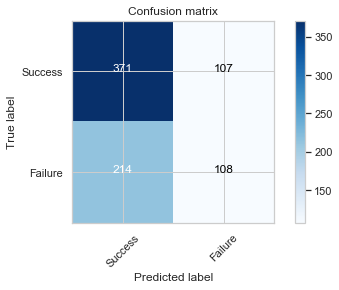

In [35]:
# Defining the kNNClassifier with 5 neighbors
knn = KNeighborsClassifier(n_neighbors = 5)

#Fitting the classifier to the training set
knn.fit(X_train,y_train)
print ("kNN Accuracy is %2.2f" % accuracy_score(y_test, knn.predict(X_test)))

#The cross validation score is obtained for kNN using 10 folds
#Cross-validation is used to split the data into training and test sets to evaluate how the model performs

score_knn = cross_val_score(knn, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_knn)
y_pred= knn.predict(X_test)
print(classification_report(y_test, y_pred))

#Defining the confusion matrix
cm = confusion_matrix(y_test,y_pred)

#Plotting the confusion matrix
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Logistic Accuracy is 0.81
Cross Validation Score = 0.81
              precision    recall  f1-score   support

           0       0.82      0.87      0.85       478
           1       0.79      0.72      0.75       322

   micro avg       0.81      0.81      0.81       800
   macro avg       0.81      0.79      0.80       800
weighted avg       0.81      0.81      0.81       800



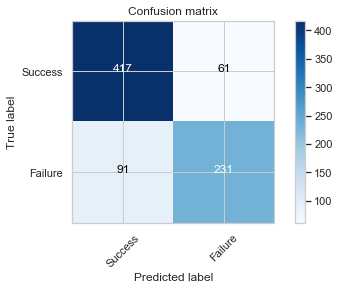

In [36]:
#Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(X_train,y_train)
print ("Logistic Accuracy is %2.2f" % accuracy_score(y_test, LR.predict(X_test)))
score_LR = cross_val_score(LR, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_LR)
y_pred = LR.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion matrix for LR
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

SVM Accuracy is 0.59
Cross Validation Score = 0.59
              precision    recall  f1-score   support

           0       0.60      0.93      0.73       478
           1       0.43      0.08      0.14       322

   micro avg       0.59      0.59      0.59       800
   macro avg       0.52      0.50      0.43       800
weighted avg       0.53      0.59      0.49       800



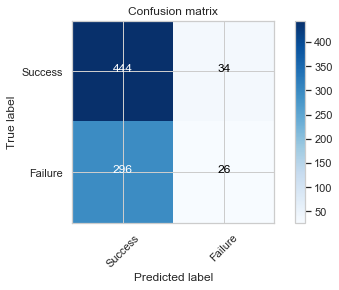

In [37]:
#SVM Classifier
SVM = svm.SVC()
SVM.fit(X_train, y_train)
print ("SVM Accuracy is %2.2f" % accuracy_score(y_test, SVM.predict(X_test)))
score_svm = cross_val_score(SVM, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_svm)
y_pred = SVM.predict(X_test)
print(classification_report(y_test,y_pred))
#Confusion matrix for SVM
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Decision Tree Accuracy is 0.81
Cross Validation Score = 0.81
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       478
           1       0.76      0.80      0.77       322

   micro avg       0.81      0.81      0.81       800
   macro avg       0.81      0.81      0.81       800
weighted avg       0.82      0.81      0.81       800



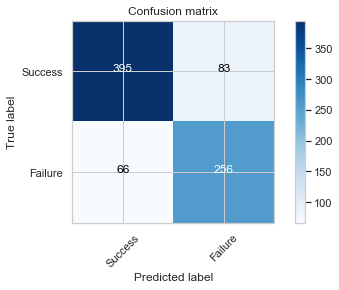

In [38]:
# Decision Tree Classifier
DT = tree.DecisionTreeClassifier(random_state = 0,class_weight="balanced",
    min_weight_fraction_leaf=0.01)
DT = DT.fit(X_train,y_train)
print ("Decision Tree Accuracy is %2.2f" % accuracy_score(y_test, DT.predict(X_test)))
score_DT = cross_val_score(DT, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_DT)
y_pred = DT.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion Matrix for Decision Tree
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

Random Forest Accuracy is 0.84
Cross Validation Score = 0.84
              precision    recall  f1-score   support

           0       0.87      0.87      0.87       478
           1       0.80      0.80      0.80       322

   micro avg       0.84      0.84      0.84       800
   macro avg       0.83      0.84      0.84       800
weighted avg       0.84      0.84      0.84       800



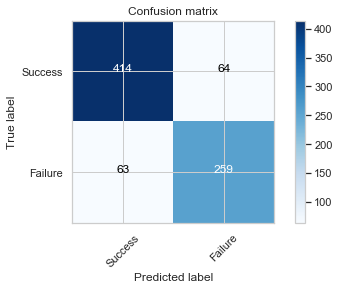

In [39]:
#Random Forest Classifier
rfc = RandomForestClassifier(n_estimators=1000, max_depth=None, min_samples_split=10,class_weight="balanced")
rfc.fit(X_train, y_train)
print ("Random Forest Accuracy is %2.2f" % accuracy_score(y_test, rfc.predict(X_test)))
score_rfc = cross_val_score(rfc, X, y, cv=10).mean()
print("Cross Validation Score = %2.2f" % score_rfc)
y_pred = rfc.predict(X_test)
print(classification_report(y_test,y_pred ))
#Confusion Matrix for Random Forest
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=class_names, title='Confusion matrix')

[0.05761931 0.00253261 0.05594545 0.02941189 0.01499906 0.05982496
 0.04235315 0.01631527 0.01300455 0.27214101 0.01054199 0.01000524
 0.00524042 0.00398109 0.01266384 0.00755234 0.00545127 0.00909856
 0.00568982 0.01234591 0.00487146 0.01094867 0.01270036 0.01193661
 0.00877872 0.01260133 0.01255465 0.01325109 0.02972417 0.00620853
 0.0151996  0.01535918 0.00224834 0.00998782 0.00791054 0.01651226
 0.01392768 0.01097385 0.01646016 0.00991711 0.01073789 0.00996015
 0.00799375 0.01546096 0.00513648 0.06192089]


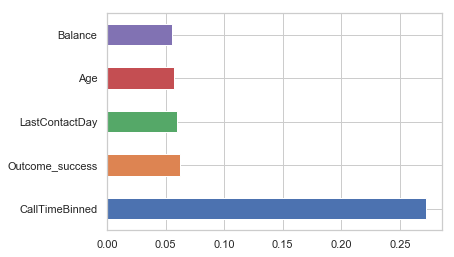

In [40]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest().plot(kind='barh')
plt.show()

Identifiying the key feature(s) can be helpful as it determines which factors influence the data.  Here we see the Call Time Binned greatly affected this insurance cold calling campaign.

## Conclusion

Based on the predictive modeling, Random Forest had the highest precentage of 84%, and a cross validation score of 84%.  I think this is a very good model as the accuracy and cross validation score are fairly high.  We could use other features to explore if the accuracy and cross validation scores go higher into though.  

Interestingly, Call Time had the most effect on customers who were cold called.  This could be due to the fact that the car insurnace agents conducting the cold calls, provided excellent customer service and spent enough time on the phone with potential customers.  Last Contact Day also showed that potential customers were contacted regulary to see if they would like to purchase car insurance.  

Lastly it was determined from the data that: potential customers with teriary (advanced) educations are more likely to purchase insurance; single people are more likely to purchase insurance; students, retired and unemployed people are purchasing the most car insurance polices; and many people buy insurance in March, September, October and December (which seems to correspond to the change in seasons).